In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('micro_credit.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,6/17/2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,6/12/2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,7/29/2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,7/25/2016


# Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The 

Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [3]:
print('Number of rows and columns in dataset are:',df.shape)

Number of rows and columns in dataset are: (209593, 37)


In [4]:
df.isnull().values.any()

False

dataset has no nan values present

In [5]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

# we can see that pdate pcircle and msisdn columns are in object type 

# pdate represents date
misdn represents mobile numbers of users and that are unique all the time
pcircle same output for all the columns so we can drop pcircle and msisdn as well as unnamed as it is of no use for model building 

In [7]:
#dropping the columns which are of no use
df=df.drop(['pcircle','msisdn','Unnamed: 0'],axis=1)

# we need to convert the pdate into numerical data 

In [8]:
#convering the pdate from object type data to numerical and in date month and year format
df['pdate'] =  pd.to_datetime(df['pdate'])
df["pyear"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.year
df["pmonth"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.month
df["pday"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.day

In [9]:
#dropping the column pdate as we have already converted the column in date month and year
df = df.drop(["pdate"],axis=1)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pyear,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0.0,2.0,12,6,0.0,29.000000,29.000000,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0.0,1.0,12,12,0.0,0.000000,0.000000,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0.0,7.0,42,6,0.0,2.333333,2.333333,2016,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,0.0,2.0,12,6,0.0,1.000000,1.000000,2016,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,0.0,3.0,18,6,0.0,1.000000,1.000000,2016,6,12
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,0.0,6.0,54,12,0.0,4.000000,3.833333,2016,7,29
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,0.0,3.0,24,12,0.0,0.000000,10.500000,2016,7,25


# EDA

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1    183431
0     26162
Name: label, dtype: int64


95.0000        392
92.0000        362
96.0000        357
99.0000        356
157.0000       349
              ... 
832037.7123      1
932056.6019      1
890451.7726      1
670233.0281      1
919992.9709      1
Name: aon, Length: 4507, dtype: int64


0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
2074.366667        1
3210.520000        1
10279.402670       1
94.225000          1
3265.066667        1
Name: daily_decr30, Length: 146328, dtype: int64


0.00        4063
500.00       782
1000.00      490
700.00       343
600.00       319
            ... 
6984.77        1
14636.64       1
8482.00        1
33557.90       1
3913.55        1
Name: daily_decr90, Length: 155483, dtype: int64


0.00       7566
200.13     1379
99.56      1020
400.26      530
199.12      461
           ... 
1233.43       1
5467.92       1
4887.48       1
1047.30       1
1683.60       1
Nam

# from the above observations :-
    
   # pyear has only one data so we can drop the columns as we already have month and day to define the entry
    
   # columns like fr_da_rech90, medianamnt_loans30, medianamnt_loans90,last_rech_date_da,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,maxamnt_loans30, maxamnt_loans90 are showing biasing in their data  as you can see above in the value counts.
    

In [11]:
#dropping the above mentioned columns
df=df.drop(['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30',],axis=1)
df=df.drop(['medianamnt_loans90','pyear','maxamnt_loans90','maxamnt_loans30'],axis=1)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,1539.0,7.50,2,12,2.0,12,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,5787.0,61.04,1,12,1.0,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1539.0,66.32,1,6,1.0,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,947.0,2.50,2,12,2.0,12,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,2888.0,35.00,7,42,7.0,42,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,3178.0,91.81,2,12,2.0,12,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,773.0,111.80,3,18,3.0,18,1.000000,1.000000,6,12
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,1539.0,47.13,4,42,6.0,54,4.000000,3.833333,7,29
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2410.5,100.00,2,18,3.0,24,0.000000,10.500000,7,25


In [12]:
#describing the data
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,2064.452797,3.978057,3737.355121,...,1864.595821,92.025541,2.758981,17.952021,18.520919,23.645398,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,2370.786034,4.256090,53643.625172,...,2081.680664,369.215658,2.554502,17.379741,224.797423,26.469861,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,0.000000,0.000000,0.000000,...,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,770.000000,1.000000,0.000000,...,773.000000,14.600000,1.000000,6.000000,1.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,1539.000000,3.000000,2.000000,...,1539.000000,36.000000,2.000000,12.000000,2.000000,12.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,2309.000000,5.000000,6.000000,...,1924.000000,79.310000,4.000000,24.000000,5.000000,30.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,55000.000000,203.000000,999606.368100,...,55000.000000,41456.500000,50.000000,306.000000,4997.517944,438.000000,171.500000,171.500000,8.000000,31.00000


# we can see there are some columns with negative values which we need to convert them into positive 

In [13]:
#using abs function to convert negative values into postive
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])

# visualization

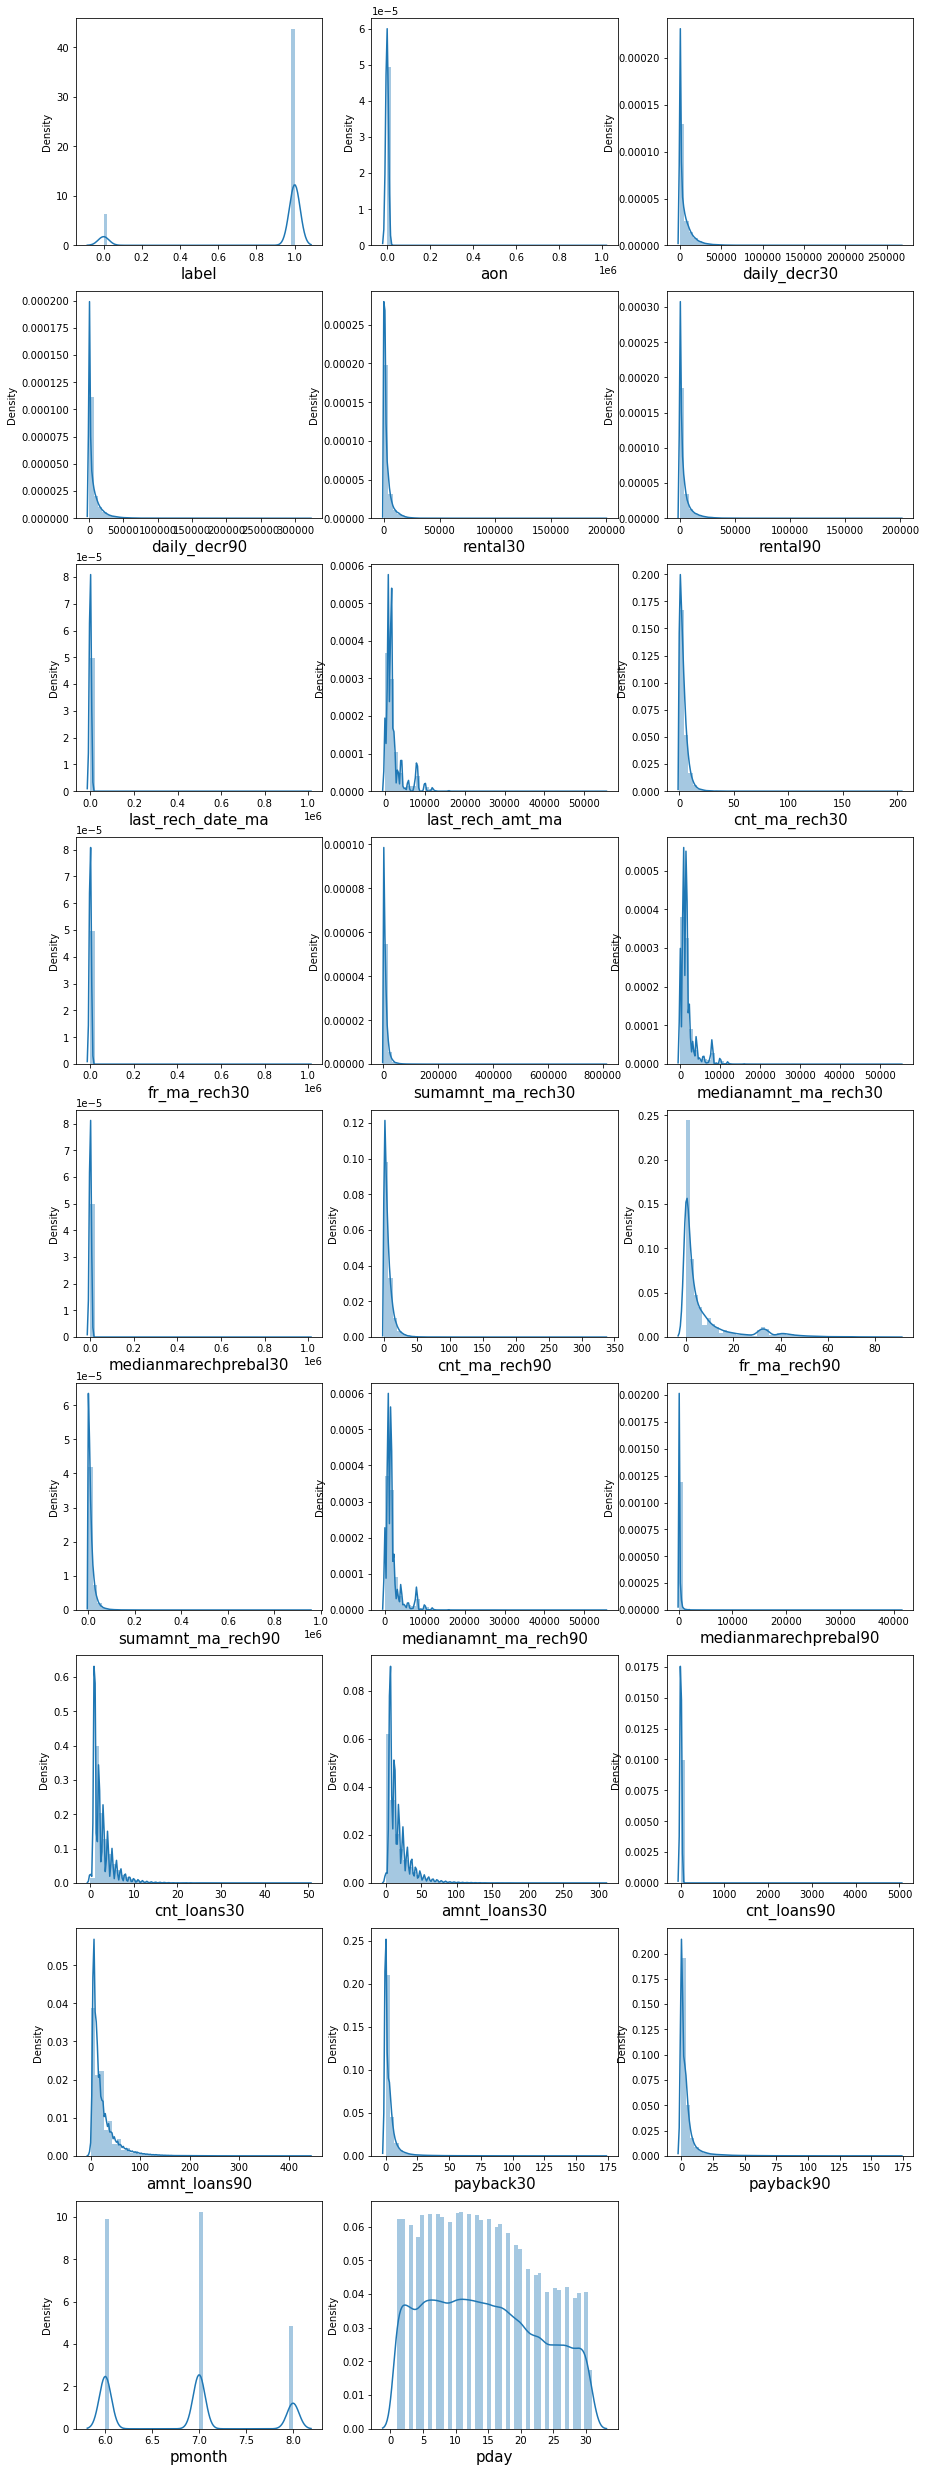

In [14]:
#plotting dist plots to check the biasing in the data
plt.figure(figsize=(15,200))
plotnumber=1
for i in df.columns:
    ax=plt.subplot(40,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

# OBSERVATIONS:
   # there is skewness in most of the columns so we have to treat them.
   # pmonth and pday shows biomodal distribution

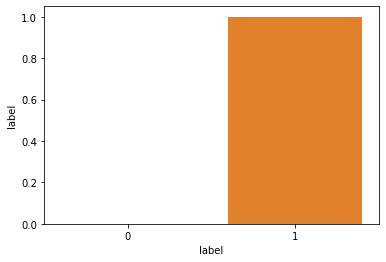

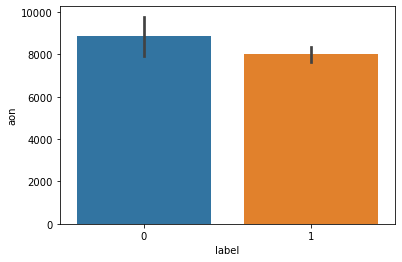

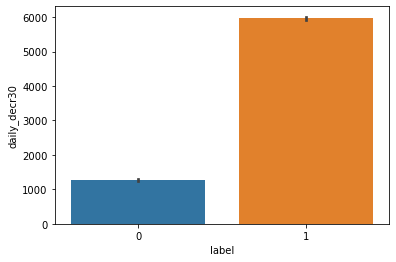

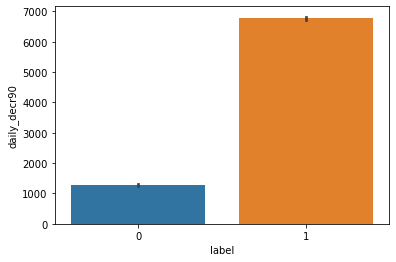

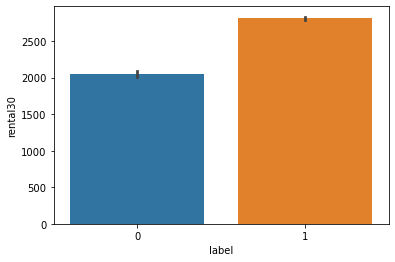

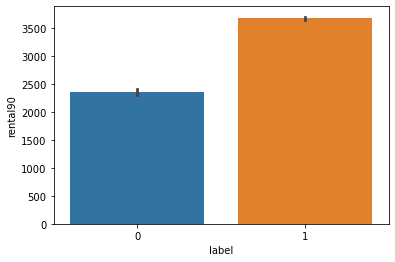

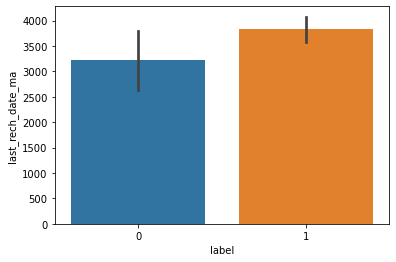

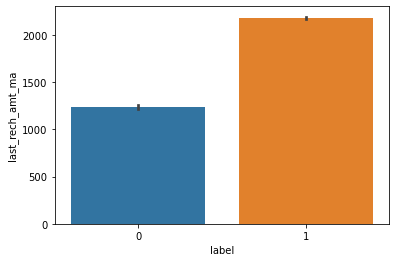

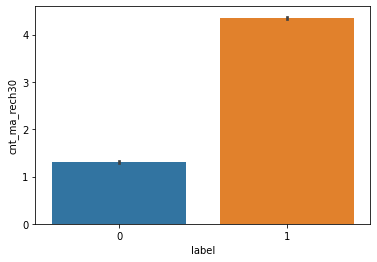

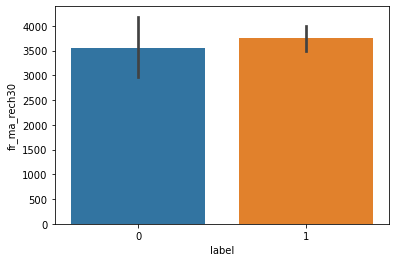

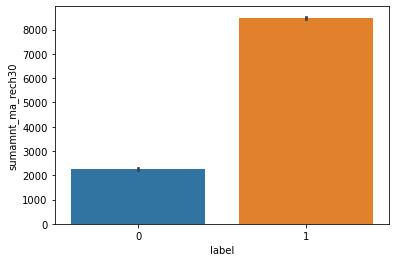

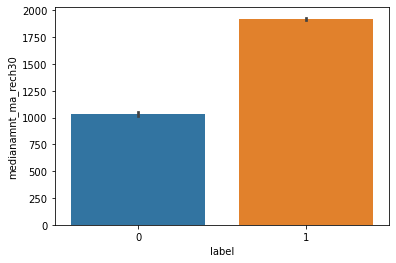

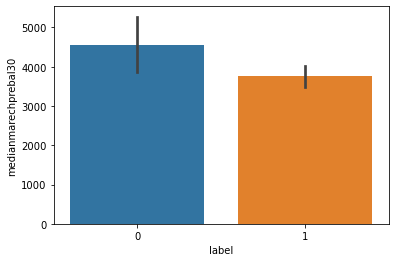

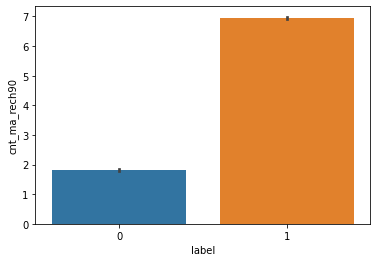

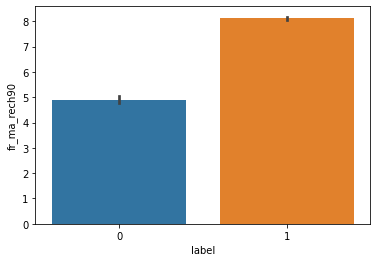

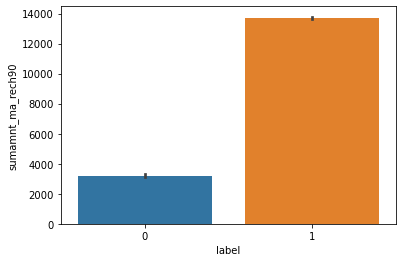

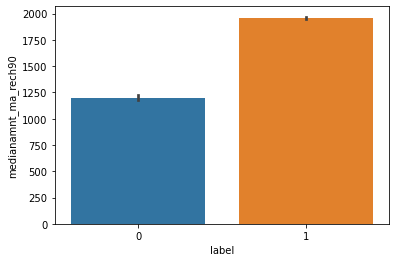

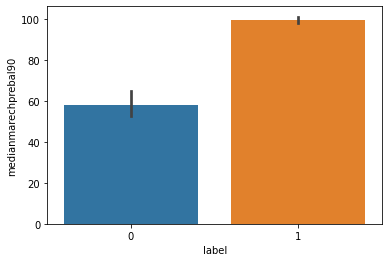

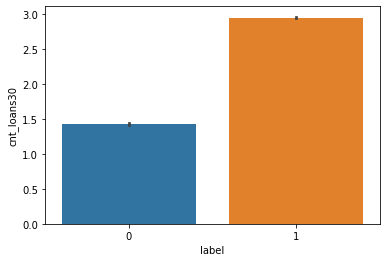

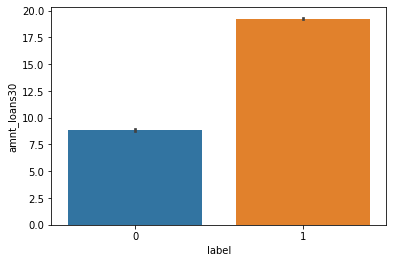

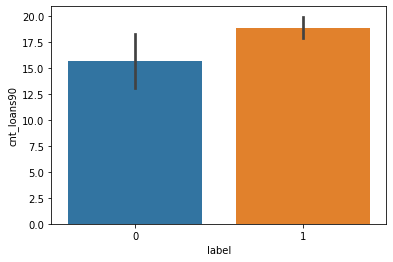

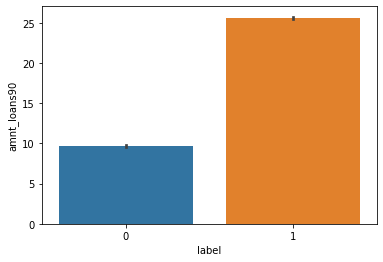

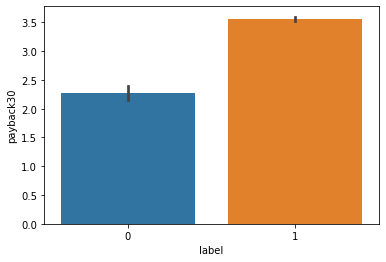

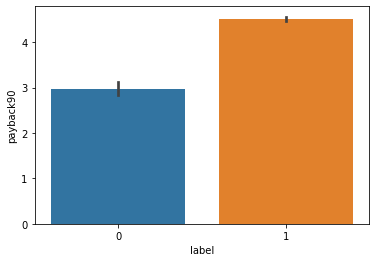

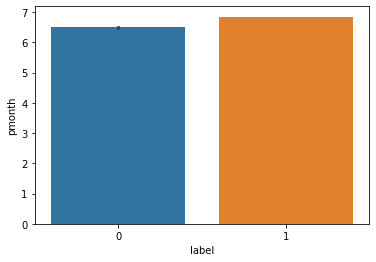

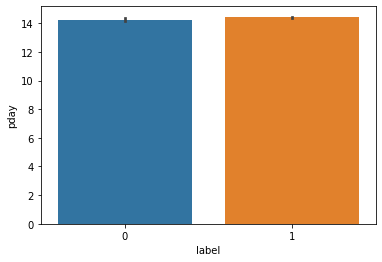

In [15]:
#plotting barplots of other columns with refrence to our output columns which is label
for i in df.columns:
    sns.barplot(x=df['label'],y=df[i])
    plt.xlabel('label',fontsize=10)
    plt.ylabel(i,fontsize=10)
    plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

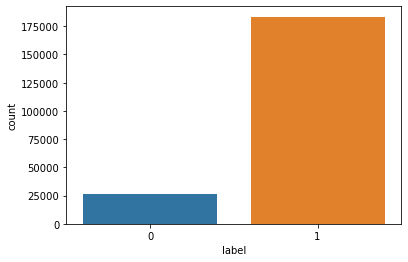

In [18]:
sns.countplot(df['label'])   

<AxesSubplot:xlabel='pmonth', ylabel='count'>

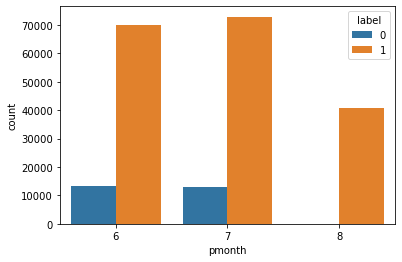

In [19]:
sns.countplot(df['pmonth'],hue='label',data=df)

# obseravation from the above graphs :-
   People with longer duration of network usage are maximum defaulters

People with higher Median of main account balance just before recharge in last 30 days at user level are maximum defaulters

people with majority of Daily amount spent from main account, averaged over last 30 days (daily_decr30) are most likely to pay their loan.

people with majority of Daily amount spent from main account, averaged over last 90 days(daily_decr90) are most likely to pay their loan.

people with majority of Average main account balance over last 30 days(rental30) are most likely to pay their loan.

people with majority of Average main account balance over last 90 days(rental90) are most likely to pay their loan.

people with majority of days till last recharge of main account(last_rech_date_ma) are most likely to pay their loan.

people with majority of Amount of last recharge of main account (last_rech_amt_ma) are most likely to pay their loan.

people with majority of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are most likely to pay their loan.

people with majority of Frequency of main account recharged in last 30 days(fr_ma_rech30) are are most likely to pay their loan 
and also the count is high for defaulters comparitively Non-defaulters are more in number.

people with majority of Total amount of recharge in main account over last 30 days (sumamnt_ma_rech30) are most likely to pay their loan.

people with majority of Median of amount of recharges done in main account over last 30 days at user level (medianamnt_ma_rech30) are most likely to pay their loan.

people with majority of Median of main account balance just before recharge in last 30 days at user level (medianmarechprebal30) are most likely to pay their loan.

people with majority of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are most likely to pay their loan.

people with majority of Frequency of main account recharged in last 90 days(fr_ma_rech90) are most likely to pay their loan.

people with majority of Total amount of recharge in main account over last 90 days (sumamnt_ma_rech90) are most likely to pay their loan.

people with majority of Median of amount of recharges done in main account over last 90 days at user level (medianamnt_ma_rech90) are most likely to pay their loan.

people with majority of Median of main account balance just before recharge in last 90 days at user level (medianmarechprebal90) are most likely to pay their loan.

people with majority of Number of loans taken by user in last 30 days(cnt_loans30) are most likely to pay their loan.

people with majority of Total amount of loans taken by user in last 30 days(amnt_loans30) are most likely to pay their loan.

people with majority of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are most likely to pay their loan.

people with majority of Number of loans taken by user in last 90 days(cnt_loans90) are most likely to pay their loan.

people with majority of Total amount of loans taken by user in last 90 days(amnt_loans90) are most likely to pay their loan.

people with majority of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are most likely to pay their loan.

people with majority of Average payback time in days over last 30 days(payback30) are most likely to pay their loan.

people with majority of Average payback time in days over last 90 days(payback90) are most likely to pay their loan.

People having pmonth 8 have always payed back their loan

<AxesSubplot:>

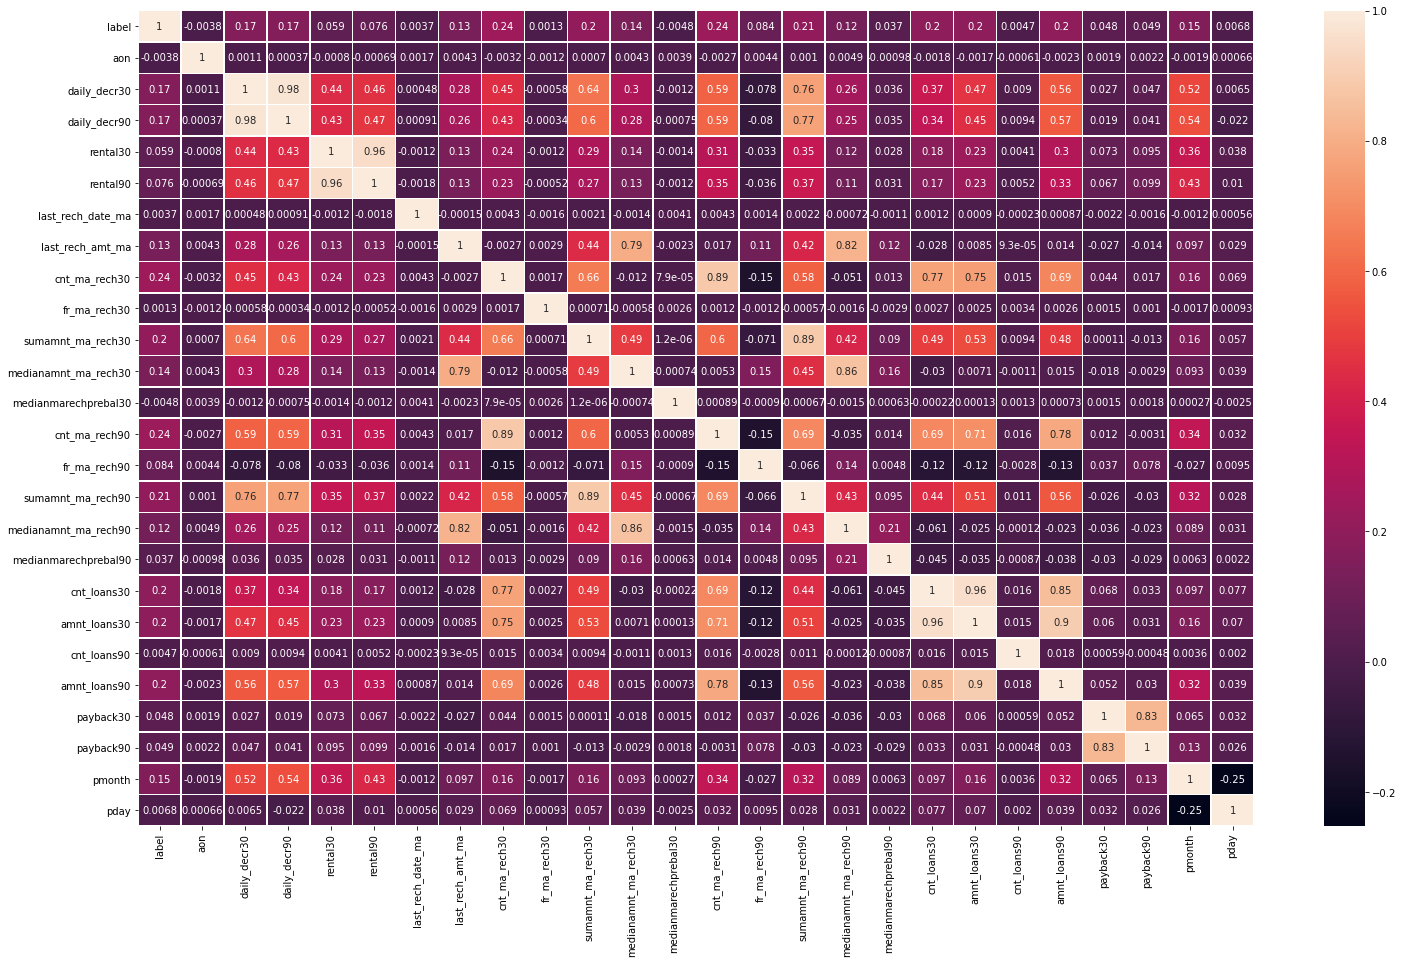

In [20]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

# observation :-
    
    pday, cnt_loans90, medianmarechprebal90, medianmarechprebal30, fr_ma_rech30, aon have very less correlation with the label 
    
    cnt_ma_rech30, cnt_ma_rech90, sumamnt_ma_rech30 are some of the columns highest correlation with label
    

# we decide to drop pday and cnt_loans90, last_rech_date_ma as they have the lowest correlation with output variable

In [21]:
df=df.drop(['pday','cnt_loans90'],axis=1)

In [22]:
df=df.drop(['last_rech_date_ma'],axis=1)

# checking for outliers

label                      AxesSubplot(0.125,0.772143;0.110714x0.107857)
aon                     AxesSubplot(0.257857,0.772143;0.110714x0.107857)
daily_decr30            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
daily_decr90            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
rental30                AxesSubplot(0.656429,0.772143;0.110714x0.107857)
rental90                AxesSubplot(0.789286,0.772143;0.110714x0.107857)
last_rech_amt_ma           AxesSubplot(0.125,0.642714;0.110714x0.107857)
cnt_ma_rech30           AxesSubplot(0.257857,0.642714;0.110714x0.107857)
fr_ma_rech30            AxesSubplot(0.390714,0.642714;0.110714x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.523571,0.642714;0.110714x0.107857)
medianamnt_ma_rech30    AxesSubplot(0.656429,0.642714;0.110714x0.107857)
medianmarechprebal30    AxesSubplot(0.789286,0.642714;0.110714x0.107857)
cnt_ma_rech90              AxesSubplot(0.125,0.513286;0.110714x0.107857)
fr_ma_rech90            AxesSubplot(0.257857,0.5132

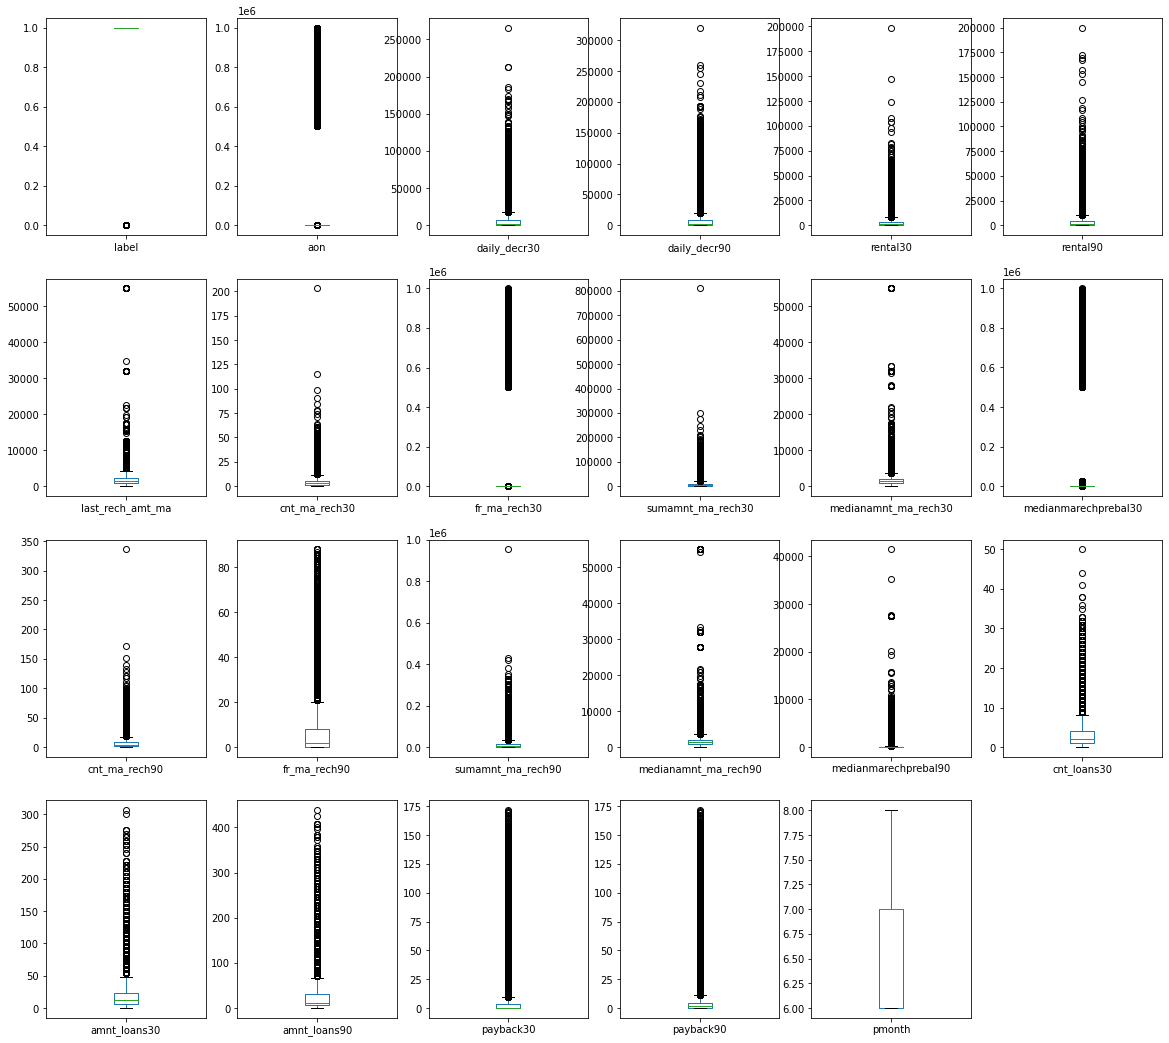

In [23]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,28))

# outliers are present in almost all the columns except for pmonth

In [24]:
df.shape

(209593, 23)

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([    21,     22,     22, ..., 209580, 209581, 209586], dtype=int64), array([13, 13, 21, ..., 15,  3, 19], dtype=int64))


In [26]:
df1=df[(z<3).all(axis=1)]
df1

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,amnt_loans90,payback30,payback90,pmonth
0,0,272.0,3055.050000,3065.150000,220.13,260.13,1539,2,21.0,3078.0,...,21,3078,1539.0,7.50,2,12,12,29.000000,29.000000,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,5787,1,0.0,5787.0,...,0,5787,5787.0,61.04,1,12,12,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,1539,1,0.0,1539.0,...,0,1539,1539.0,66.32,1,6,6,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,947,0,0.0,0.0,...,0,947,947.0,2.50,2,12,12,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,2309,7,2.0,20029.0,...,2,23496,2888.0,35.00,7,42,42,2.333333,2.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,4048,3,2.0,10404.0,...,2,10404,3178.0,91.81,2,12,12,1.000000,1.000000,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,773,4,1.0,3092.0,...,2,4038,773.0,111.80,3,18,18,1.000000,1.000000,6
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,1539,5,8.0,9334.0,...,5,18592,1539.0,47.13,4,42,54,4.000000,3.833333,7
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,773,5,4.0,12154.0,...,4,17941,2410.5,100.00,2,18,24,0.000000,10.500000,7


In [27]:
df1.shape

(175330, 23)

In [28]:
data_loss=(209593-175330)/209593*100
data_loss

16.34739709818553

# the data loss is more that 7%-8% so we cant use zscore 

# we will use the quantile method to reduce outliers as much as we can as well as maintaining data loss of less that 8%


In [29]:
for col in df.columns:
    percentile = df[col].quantile([0.01,0.98]).values
    df[col][df[col]<=percentile[0]]=percentile[0]
    df[col][df[col]>=percentile[1]]=percentile[1]

label                      AxesSubplot(0.125,0.772143;0.110714x0.107857)
aon                     AxesSubplot(0.257857,0.772143;0.110714x0.107857)
daily_decr30            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
daily_decr90            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
rental30                AxesSubplot(0.656429,0.772143;0.110714x0.107857)
rental90                AxesSubplot(0.789286,0.772143;0.110714x0.107857)
last_rech_amt_ma           AxesSubplot(0.125,0.642714;0.110714x0.107857)
cnt_ma_rech30           AxesSubplot(0.257857,0.642714;0.110714x0.107857)
fr_ma_rech30            AxesSubplot(0.390714,0.642714;0.110714x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.523571,0.642714;0.110714x0.107857)
medianamnt_ma_rech30    AxesSubplot(0.656429,0.642714;0.110714x0.107857)
medianmarechprebal30    AxesSubplot(0.789286,0.642714;0.110714x0.107857)
cnt_ma_rech90              AxesSubplot(0.125,0.513286;0.110714x0.107857)
fr_ma_rech90            AxesSubplot(0.257857,0.5132

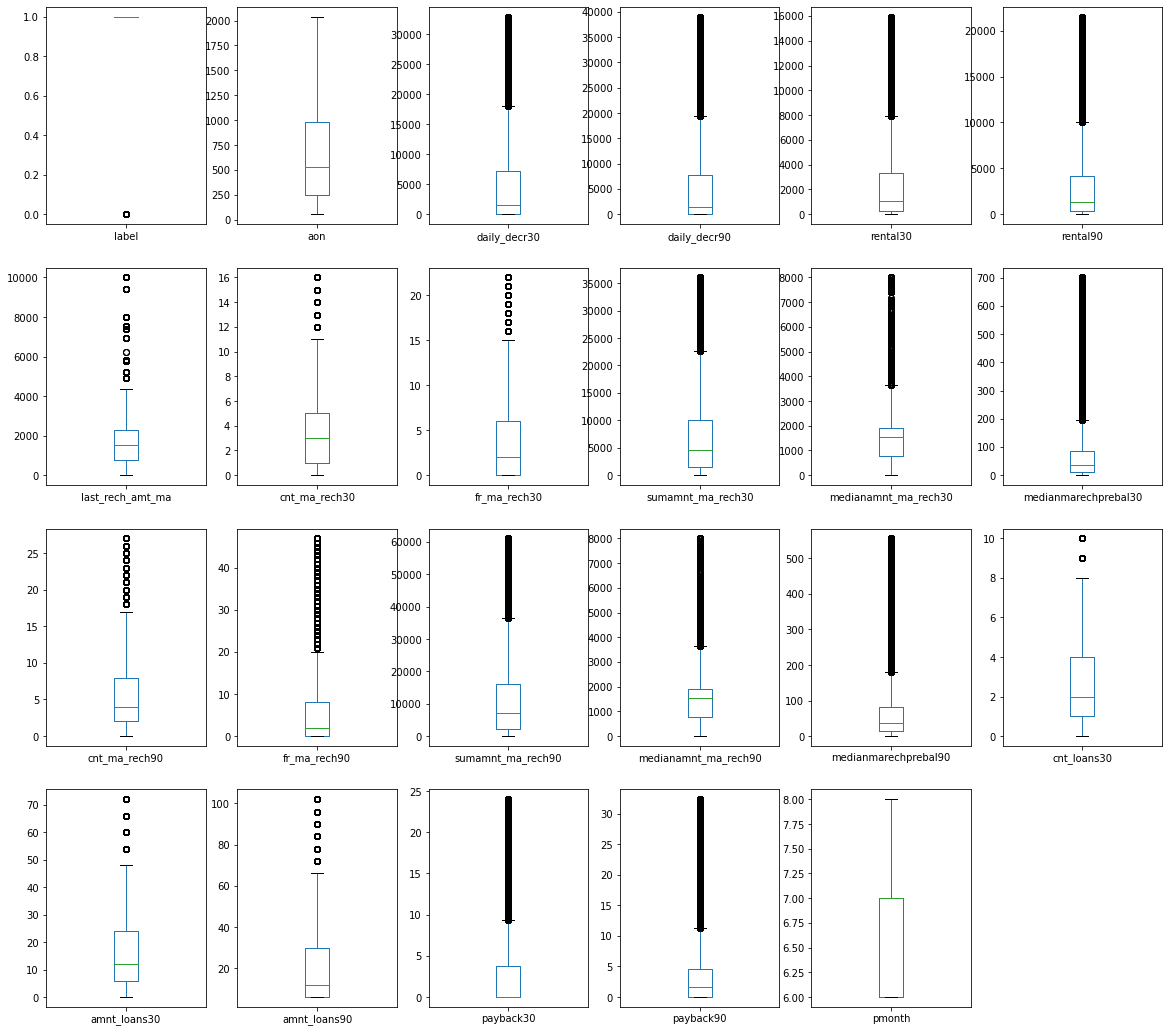

In [30]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,28))

# we can see that quantile method was able to remove outliers with minimum data loss

In [31]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
       'amnt_loans30', 'amnt_loans90', 'payback30', 'payback90', 'pmonth'],
      dtype='object')

# we saw that the data was not balanced with refrence to output variable will balance the data using smote


<AxesSubplot:xlabel='label', ylabel='count'>

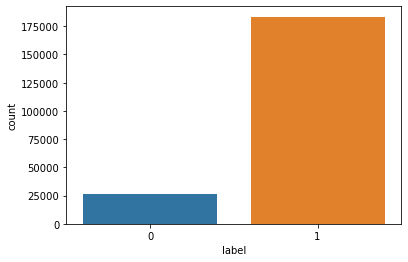

In [32]:
sns.countplot(df['label'])

it is highly unbalanced

In [33]:
dfx=df.drop(['label'],axis=1)
dfy=df['label']

In [34]:
dfx

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,amnt_loans90,payback30,payback90,pmonth
0,272.0,3055.050000,3065.150000,220.13,260.13,1539,2,21.0,3078.0,1539.0,...,21,3078.0,1539.0,7.50,2,12,12,24.000000,29.000000,7
1,712.0,12122.000000,12124.750000,3691.26,3691.26,5787,1,0.0,5787.0,5787.0,...,0,5787.0,5787.0,61.04,1,12,12,0.000000,0.000000,8
2,535.0,1398.000000,1398.000000,900.13,900.13,1539,1,0.0,1539.0,1539.0,...,0,1539.0,1539.0,66.32,1,6,6,0.000000,0.000000,8
3,241.0,21.228000,21.228000,159.42,159.42,947,0,0.0,0.0,0.0,...,0,947.0,947.0,2.50,2,12,12,0.000000,0.000000,6
4,947.0,150.619333,150.619333,1098.90,1098.90,2309,7,2.0,20029.0,2309.0,...,2,23496.0,2888.0,35.00,7,42,42,2.333333,2.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,4048,3,2.0,10404.0,3178.0,...,2,10404.0,3178.0,91.81,2,12,12,1.000000,1.000000,6
209589,1075.0,36.936000,36.936000,1728.36,1728.36,773,4,1.0,3092.0,773.0,...,2,4038.0,773.0,111.80,3,18,18,1.000000,1.000000,6
209590,1013.0,11843.111670,11904.350000,5861.83,8893.20,1539,5,8.0,9334.0,1539.0,...,5,18592.0,1539.0,47.13,4,42,54,4.000000,3.833333,7
209591,1732.0,12488.228330,12574.370000,411.83,984.58,773,5,4.0,12154.0,773.0,...,4,17941.0,2410.5,100.00,2,18,24,0.000000,10.500000,7


In [35]:
dfy

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(dfx,dfy)

<AxesSubplot:xlabel='label', ylabel='count'>

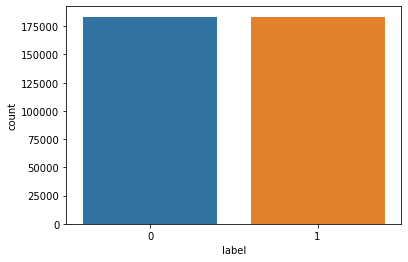

In [37]:
sns.countplot(y)

# the data is now balanced

# removing the skewness

In [38]:
x.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
       'amnt_loans30', 'amnt_loans90', 'payback30', 'payback90', 'pmonth'],
      dtype='object')

In [39]:
from sklearn.preprocessing import power_transform
x[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
       'amnt_loans30', 'amnt_loans90', 'payback30', 'payback90', 'pmonth']]=power_transform(x[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
       'amnt_loans30', 'amnt_loans90', 'payback30', 'payback90', 'pmonth']],method='yeo-johnson')
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,amnt_loans90,payback30,payback90,pmonth
0,-0.573855,0.795926,0.779300,-0.608336,-0.589046,0.373803,0.207379,1.657259,0.318449,0.517125,...,1.449467,0.073077,0.415657,-0.528079,0.488198,0.258521,0.348930,1.703473,1.700301,0.680133
1,0.505073,1.316329,1.284987,0.880210,0.749855,1.515711,-0.327267,-0.902678,0.636111,1.567154,...,-0.973127,0.380484,1.649640,0.609262,-0.667857,0.258521,0.348930,-0.752064,-0.816568,1.670386
2,0.166762,0.517880,0.505973,0.033464,-0.044031,0.373803,-0.327267,-0.902678,0.014988,0.517125,...,-0.973127,-0.218278,0.415657,0.662222,-0.667857,-0.706333,-0.951843,-0.752064,-0.816568,1.670386
3,-0.697897,-0.772283,-0.771194,-0.731981,-0.771386,0.057930,-1.351509,-0.902678,-1.507516,-1.544366,...,-0.973127,-0.397212,0.079736,-0.952493,0.488198,0.258521,0.348930,-0.752064,-0.816568,-1.033784
4,0.858710,-0.210623,-0.212110,0.139540,0.055971,0.676018,1.329945,0.593806,1.398313,0.798879,...,0.298438,1.238303,0.937012,0.269658,1.857117,1.841087,1.488061,1.072658,0.843859,-1.033784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,1.048721,0.680685,0.667006,-0.176430,-0.084328,0.535500,-0.327267,-0.902678,0.107948,0.668267,...,1.464891,0.176899,0.588639,0.077243,-0.667857,0.008773,0.066731,-0.752064,1.666756,0.680133
366858,-1.199237,-1.560326,-1.564865,-1.392538,-1.409570,-1.680339,-1.351509,-0.902678,-1.507516,-1.544366,...,-0.973127,-1.626985,-1.691047,-1.477933,-0.667857,-0.706333,-0.951843,-0.752064,-0.816568,-1.033784
366859,1.011848,0.493746,0.482912,0.580619,0.706346,0.373803,-0.327267,-0.902678,0.014988,0.517125,...,-0.973127,-0.218278,0.415657,0.272634,-0.667857,-0.706333,-0.951843,-0.752064,-0.816568,0.680133
366860,1.330408,-0.476316,-0.475953,-0.394870,-0.449709,0.944189,-0.327267,-0.902678,0.334915,1.046452,...,-0.973127,0.088953,1.028659,-0.494017,-0.667857,-0.137160,-0.114604,1.028910,0.796397,-1.033784


# feature scaling

In [40]:
sc=StandardScaler()
x[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
       'amnt_loans30', 'amnt_loans90', 'payback30', 'payback90', 'pmonth']]=sc.fit_transform(x[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
       'amnt_loans30', 'amnt_loans90', 'payback30', 'payback90', 'pmonth']])
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,amnt_loans90,payback30,payback90,pmonth
0,-0.573855,0.795926,0.779300,-0.608336,-0.589046,0.373803,0.207379,1.657259,0.318449,0.517125,...,1.449467,0.073077,0.415657,-0.528079,0.488198,0.258521,0.348930,1.703473,1.700301,0.680133
1,0.505073,1.316329,1.284987,0.880210,0.749855,1.515711,-0.327267,-0.902678,0.636111,1.567154,...,-0.973127,0.380484,1.649640,0.609262,-0.667857,0.258521,0.348930,-0.752064,-0.816568,1.670386
2,0.166762,0.517880,0.505973,0.033464,-0.044031,0.373803,-0.327267,-0.902678,0.014988,0.517125,...,-0.973127,-0.218278,0.415657,0.662222,-0.667857,-0.706333,-0.951843,-0.752064,-0.816568,1.670386
3,-0.697897,-0.772283,-0.771194,-0.731981,-0.771386,0.057930,-1.351509,-0.902678,-1.507516,-1.544366,...,-0.973127,-0.397212,0.079736,-0.952493,0.488198,0.258521,0.348930,-0.752064,-0.816568,-1.033784
4,0.858710,-0.210623,-0.212110,0.139540,0.055971,0.676018,1.329945,0.593806,1.398313,0.798879,...,0.298438,1.238303,0.937012,0.269658,1.857117,1.841087,1.488061,1.072658,0.843859,-1.033784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,1.048721,0.680685,0.667006,-0.176430,-0.084328,0.535500,-0.327267,-0.902678,0.107948,0.668267,...,1.464891,0.176899,0.588639,0.077243,-0.667857,0.008773,0.066731,-0.752064,1.666756,0.680133
366858,-1.199237,-1.560326,-1.564865,-1.392538,-1.409570,-1.680339,-1.351509,-0.902678,-1.507516,-1.544366,...,-0.973127,-1.626985,-1.691047,-1.477933,-0.667857,-0.706333,-0.951843,-0.752064,-0.816568,-1.033784
366859,1.011848,0.493746,0.482912,0.580619,0.706346,0.373803,-0.327267,-0.902678,0.014988,0.517125,...,-0.973127,-0.218278,0.415657,0.272634,-0.667857,-0.706333,-0.951843,-0.752064,-0.816568,0.680133
366860,1.330408,-0.476316,-0.475953,-0.394870,-0.449709,0.944189,-0.327267,-0.902678,0.334915,1.046452,...,-0.973127,0.088953,1.028659,-0.494017,-0.667857,-0.137160,-0.114604,1.028910,0.796397,-1.033784


In [41]:
for i in range(2,23):
    pc=PCA(n_components=i)
    principalcomponents=pc.fit_transform(x)
    print(i,sum(pc.explained_variance_ratio_))

2 0.6428590743461744
3 0.7430814309375903
4 0.7917677225766308
5 0.83614644882309
6 0.8795667714042357
7 0.9094596343215151
8 0.9335734474848829
9 0.951834365968562
10 0.9657985561535366
11 0.977451582770433
12 0.983411280804602
13 0.9877319689697835
14 0.9908798594481901
15 0.9937653409325435
16 0.995839650213956
17 0.9972554219017186
18 0.9985908728799204
19 0.9993709408410463
20 0.9998786458746889
21 0.9999729306719145
22 0.9999999999999999


# aftter all the EDA, Cleansing, scaling and balancing we can move forward to build models

# Classification Models

In [42]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
etc=ExtraTreesClassifier()
sgdc=SGDClassifier()

model=[lg,dtc,etc,sgdc]

In [43]:
#testing the models and checking their accuracy, cross_val_score as well as roc_auc-score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=45)
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(ytest,pred))
    score=cross_val_score(m,x,y,cv=5).mean()    
    print('cross_val mean score :',score)
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('roc auc score :',roc_auc_score(ytest,pred))
    print('\n')

Accuracy score of  LogisticRegression() is :
0.7867880555517697
cross_val mean score : 0.7846820404371593
[[29504  7235]
 [ 8409 28225]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     36739
           1       0.80      0.77      0.78     36634

    accuracy                           0.79     73373
   macro avg       0.79      0.79      0.79     73373
weighted avg       0.79      0.79      0.79     73373

roc auc score : 0.7867647215399677


Accuracy score of  DecisionTreeClassifier() is :
0.8943889441620214
cross_val mean score : 0.8878707854261394
[[33191  3548]
 [ 4201 32433]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     36739
           1       0.90      0.89      0.89     36634

    accuracy                           0.89     73373
   macro avg       0.89      0.89      0.89     73373
weighted avg       0.89      0.89      0.89     73373

roc auc score : 0.8943759919475

# In the above observations :- 
 
 # we checked the accuracy score, roc-auc score as well the mean cross val score with cv set to 5 what we observed is that:-
 
 # logistic regression gave us close to 79% accuracy
 
 # decision tree gave us close to 90% accuracy 
 
 # extratreesclassifier is giving us a very high accuracy with close to 95% accuracy and it is the highest among others


# Hypertuning the best parameter

In [ ]:
#checking for hypertuning
etc=ExtraTreesClassifier()
parameters={"n_estimators":[10,100,150],'criterion':['gini', 'entropy']}
clf=GridSearchCV(etc,parameters,scoring='roc_auc')
clf.fit(xtrain,ytrain)
clf.best_params_

In [53]:
etc=ExtraTreesClassifier(n_estimators=150,criterion='entropy')
etc.fit(xtrain,ytrain)
pred=etc.predict(xtest)
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

[[34631  2108]
 [ 2183 34451]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     36739
           1       0.94      0.94      0.94     36634

    accuracy                           0.94     73373
   macro avg       0.94      0.94      0.94     73373
weighted avg       0.94      0.94      0.94     73373

accuracy_score : 0.9415179970833958


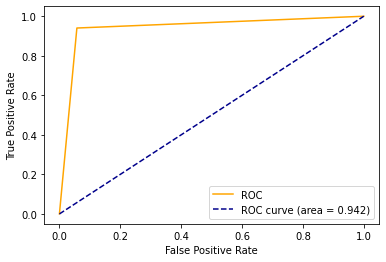

In [56]:
fpr, tpr, threshold = roc_curve(ytest,pred)
auc = roc_auc_score(ytest,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# testing the etratrees model on the whole dataset

In [49]:
#testing on the whole dataset
etc=ExtraTreesClassifier(n_estimators=150,criterion='entropy')
etc.fit(x,y)
pred=etc.predict(x)
print(confusion_matrix(y,pred))
print(classification_report(y,pred))
print('accuracy_score :',accuracy_score(y,pred))

[[183430      1]
 [    41 183390]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183431
           1       1.00      1.00      1.00    183431

    accuracy                           1.00    366862
   macro avg       1.00      1.00      1.00    366862
weighted avg       1.00      1.00      1.00    366862

accuracy_score : 0.9998855155344516


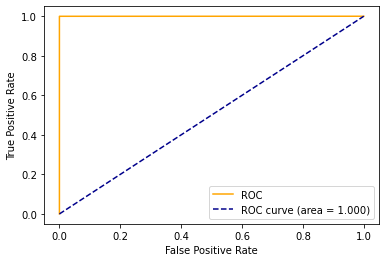

In [50]:
fpr, tpr, threshold = roc_curve(y,pred)
auc = roc_auc_score(y,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [51]:
x['predicted_label']=pred
x['label']=y
x[['predicted_label','label']]

,predicted_label,label
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
366857,0,0
366858,0,0
366859,0,0
366860,0,0


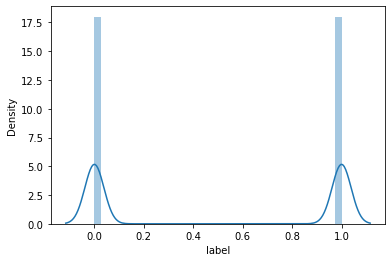

<AxesSubplot:xlabel='predicted_label', ylabel='Density'>

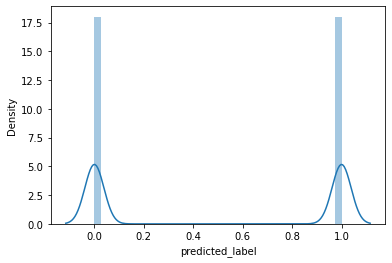

In [52]:
sns.distplot(x['label'])
plt.show()
sns.distplot(x['predicted_label'])

# we can see that the predicted values and the actual values are highly similar to each other 

# our model Extra trees is working very good with accuracy of 95% on trained data and 99% on test data

# we can save the model

# Saving the best model

In [57]:
joblib.dump(etc,'micro.obj')

['micro.obj']